In [109]:
import pandas as pd
import numpy as np
import matplotlib as mlt
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import entropy
from sklearn.neighbors import KernelDensity
from scipy.stats import chi2_contingency
from scipy.special import betaln, gammaln

In [110]:
df = pd.read_csv('C:\\Data anylsis project\\BankChurners.csv')

In [95]:
df.isnull().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [97]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [98]:
df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1'], axis=1, inplace=True)

In [99]:
df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1, inplace=True)

In [100]:
df[df.Attrition_Flag == 'Existing Customer'].describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,8.500000e+03,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000,8500.000000
mean,7.399272e+08,46.262118,2.335412,35.880588,3.914588,2.273765,2.356353,8726.877518,1256.604118,7470.273400,0.772510,4654.655882,68.672588,0.742434,0.296412
std,3.710723e+07,8.081157,1.303229,8.021810,1.528949,1.016741,1.081436,9084.969807,757.745354,9087.671862,0.217783,3512.772635,22.919011,0.228054,0.272568
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,15.000000,0.256000,816.000000,11.000000,0.028000,0.000000
25%,7.132197e+08,41.000000,1.000000,31.000000,3.000000,1.000000,2.000000,2602.000000,800.000000,1184.500000,0.643000,2384.750000,54.000000,0.617000,0.055000
50%,7.181643e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4643.500000,1364.000000,3469.500000,0.743000,4100.000000,71.000000,0.721000,0.211000
75%,7.783415e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11252.750000,1807.000000,9978.250000,0.860000,4781.250000,82.000000,0.833000,0.529250
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,5.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.994000


In [101]:
df[df.Attrition_Flag != 'Existing Customer'].describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.627000e+03,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000
mean,7.352614e+08,46.659496,2.402581,36.178242,3.279656,2.693301,2.972342,8136.039459,672.822987,7463.216472,0.694277,3095.025814,44.933620,0.554386,0.162475
std,3.557725e+07,7.665652,1.275010,7.796548,1.577782,0.899623,1.090537,9095.334105,921.385582,9109.208129,0.214924,2308.227629,14.568429,0.226854,0.264458
min,7.080833e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.123713e+08,41.000000,2.000000,32.000000,2.000000,2.000000,2.000000,2114.000000,0.000000,1587.000000,0.544500,1903.500000,37.000000,0.400000,0.000000
50%,7.165644e+08,47.000000,2.000000,36.000000,3.000000,3.000000,3.000000,4178.000000,0.000000,3488.000000,0.701000,2329.000000,43.000000,0.531000,0.000000
75%,7.683737e+08,52.000000,3.000000,40.000000,5.000000,3.000000,4.000000,9933.500000,1303.500000,9257.500000,0.856000,2772.000000,51.000000,0.692000,0.231000
max,8.282949e+08,68.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,1.492000,10583.000000,94.000000,2.500000,0.999000


In [102]:
df['Attrition_Flag']=df['Attrition_Flag'].map({'Existing Customer':1, 'Attrited Customer': 0})

In [103]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,1,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,1,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,1,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,1,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,1,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [104]:
def plot_categorical_vs_target(df, target_col='TARGET', figsize=None, max_categories=12):
    """
    Create stacked bar plots for categorical columns vs the target variable,
    showing both percentages and quantities.
    
    :param df: DataFrame containing the data
    :param target_col: Name of the target column (default 'TARGET')
    :param figsize: Figure size (width, height) in inches (default None)
    :param max_categories: Maximum number of categories to plot (default 10)
    """
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
    
    for col in df.select_dtypes(include=['int64', 'float64']).columns:
        if df[col].nunique() <= max_categories:
            categorical_cols.append(col)
    
    categorical_cols = [col for col in categorical_cols if col != target_col]
    
    if figsize is None:
        figsize = (20, 8 * len(categorical_cols))
    
    fig, axes = plt.subplots(len(categorical_cols), 2, figsize=figsize)
    if len(categorical_cols) == 1:
        axes = [axes]
    
    for i, col in enumerate(categorical_cols):
        df_plot_pct = df.groupby(col)[target_col].value_counts(normalize=True).unstack()
        df_plot_count = df.groupby(col)[target_col].value_counts().unstack()
        
        if 1 in df_plot_pct.columns:
            sort_order = df_plot_pct[1].sort_values(ascending=False).index
            df_plot_pct = df_plot_pct.loc[sort_order]
            df_plot_count = df_plot_count.loc[sort_order]
        
        if len(df_plot_pct) > max_categories:
            df_plot_pct = df_plot_pct.head(max_categories)
            df_plot_count = df_plot_count.head(max_categories)
            title = f'Top {max_categories} categories of {col} vs {target_col}'
        else:
            title = f'{col} vs {target_col}'
        
        # Plot percentages
        ax_pct = axes[i][0]
        df_plot_pct.plot(kind='bar', stacked=True, ax=ax_pct)
        ax_pct.set_title(f'{title} (Percentages)')
        ax_pct.set_xlabel(col)
        ax_pct.set_ylabel('Percentage')
        ax_pct.legend(title=target_col)
        ax_pct.set_xticklabels(ax_pct.get_xticklabels(), rotation=45, ha='right')
        for c in ax_pct.containers:
            ax_pct.bar_label(c, fmt='%.2f%%', label_type='center')
        ax_pct.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.0%}'))
        
        # Plot counts
        ax_count = axes[i][1]
        df_plot_count.plot(kind='bar', stacked=True, ax=ax_count)
        ax_count.set_title(f'{title} (Counts)')
        ax_count.set_xlabel(col)
        ax_count.set_ylabel('Count')
        ax_count.legend(title=target_col)
        ax_count.set_xticklabels(ax_count.get_xticklabels(), rotation=45, ha='right')
        for c in ax_count.containers:
            ax_count.bar_label(c, fmt='%d', label_type='center')
    
    plt.tight_layout()
    plt.show()


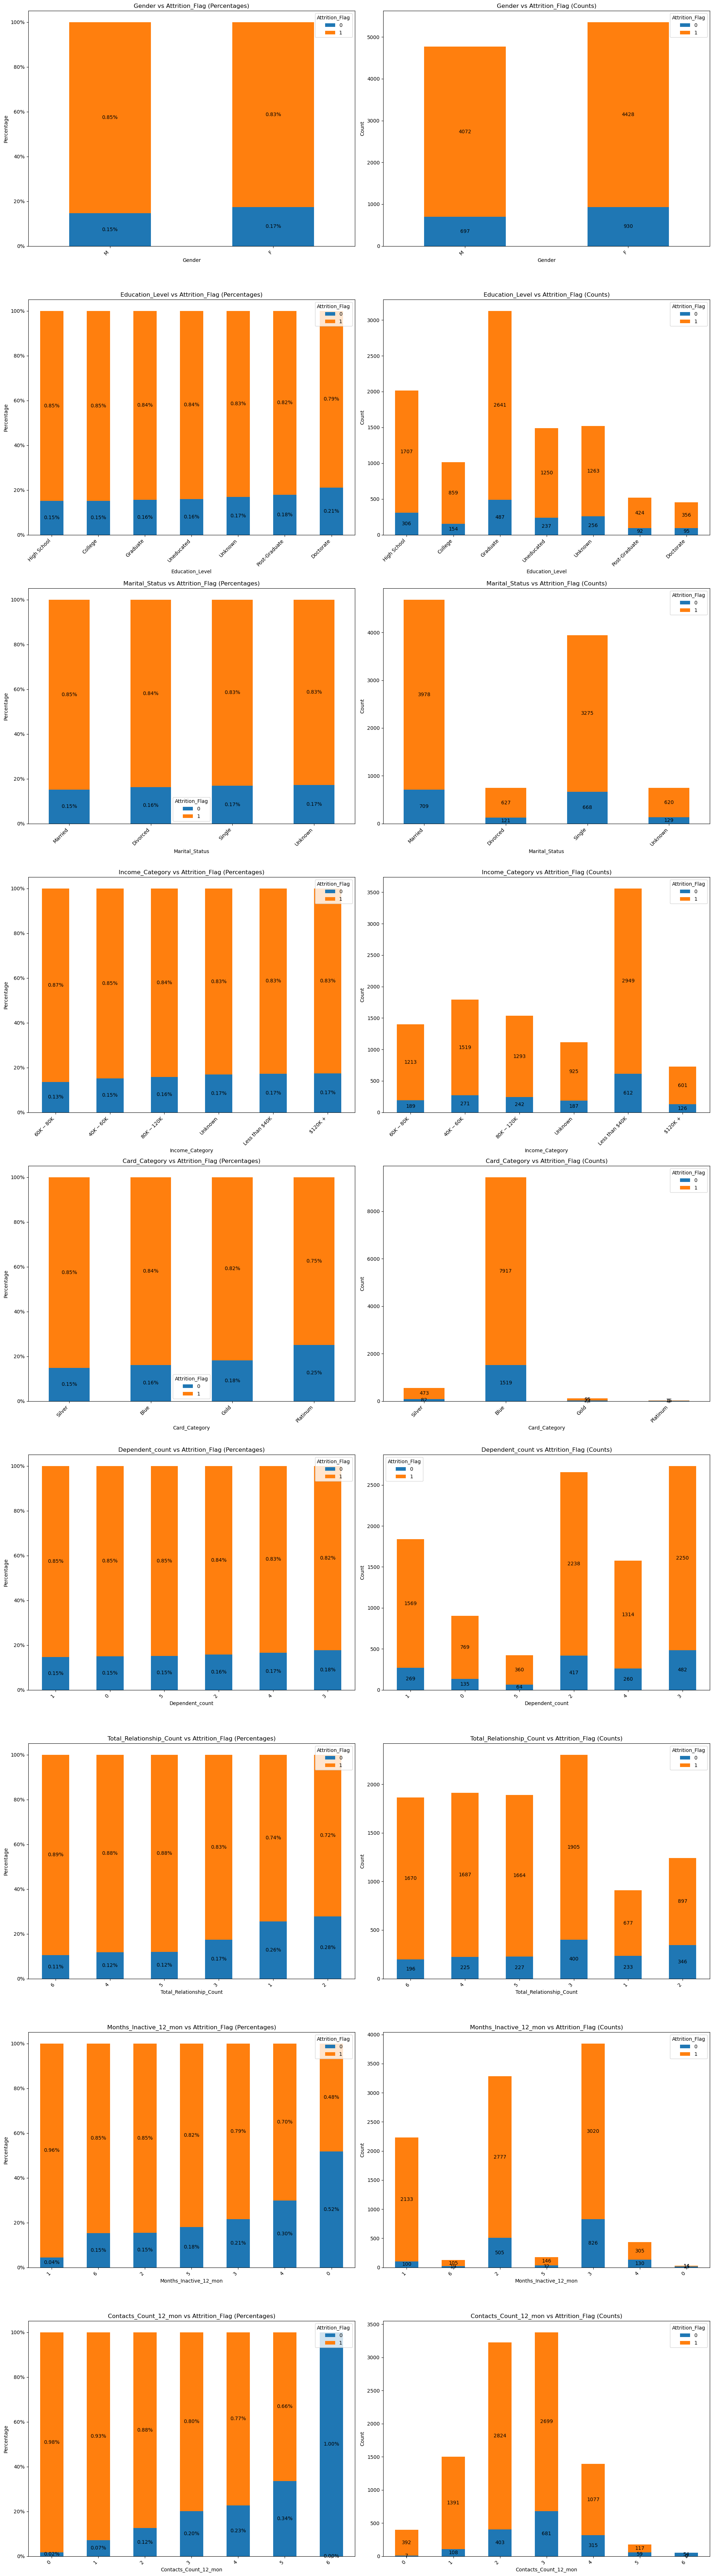

In [105]:
plot_categorical_vs_target(df,target_col ='Attrition_Flag')

In [106]:
def interpret_bayes_factor(bf):
    """
    Interpret Bayes Factor according to Kass and Raftery (1995) scale.
    
    :param bf: Bayes Factor value
    :return: tuple of (interpretation string, evidence_strength)
    """
    if bf <= 1/100:
        return "Extreme evidence for dependence", "Extreme (H1)"
    elif bf <= 1/30:
        return "Very strong evidence for dependence", "Very Strong (H1)"
    elif bf <= 1/10:
        return "Strong evidence for dependence", "Strong (H1)"
    elif bf <= 1/3:
        return "Moderate evidence for dependence", "Moderate (H1)"
    elif bf <= 3:
        return "Anecdotal evidence (inconclusive)", "Inconclusive"
    elif bf <= 10:
        return "Moderate evidence for independence", "Moderate (H0)"
    elif bf <= 30:
        return "Strong evidence for independence", "Strong (H0)"
    elif bf <= 100:
        return "Very strong evidence for independence", "Very Strong (H0)"
    else:
        return "Extreme evidence for independence", "Extreme (H0)"

def bayes_factor_independence_dirichlet(contingency_table, alpha=0.5):
    """
    Calculate the Bayes Factor using Dirichlet priors for test of independence.
    
    :param contingency_table: pandas DataFrame representing the contingency table
    :param alpha: concentration parameter for Dirichlet prior (default=0.5)
    :return: Bayes Factor
    """
    table = contingency_table.values
    n = table.sum()
    rows, cols = table.shape
    
    # Dirichlet prior concentration parameter
    alpha_prior = np.full((rows, cols), alpha)
    
    # Calculate marginal probabilities
    row_probs = table.sum(axis=1) / n
    col_probs = table.sum(axis=0) / n
    
    # Log marginal likelihood under H1 (dependence)
    log_ml_h1 = (gammaln(alpha * rows * cols) - 
                 gammaln(n + alpha * rows * cols) +
                 np.sum(gammaln(table + alpha)) - 
                 np.sum(gammaln(alpha)))
    
    # Log marginal likelihood under H0 (independence)
    expected = np.outer(row_probs * n, col_probs)
    log_ml_h0 = (gammaln(alpha * rows * cols) - 
                 gammaln(n + alpha * rows * cols) +
                 np.sum(gammaln(expected + alpha)) - 
                 np.sum(gammaln(alpha)))
    
    return np.exp(log_ml_h0 - log_ml_h1)

def categorical_statistical_tests(df, target_col='TARGET', max_categories=10, alpha=0.05):
    """
    Perform statistical tests (Chi-square and Bayes Factor) for categorical columns vs the target variable.
    
    :param df: DataFrame containing the data
    :param target_col: Name of the target column (default 'TARGET')
    :param max_categories: Maximum number of categories to consider (default 10)
    :param alpha: Significance level for chi-square test (default 0.05)
    :return: DataFrame with test results and interpretations
    """
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
    
    for col in df.select_dtypes(include=['int64', 'float64']).columns:
        if df[col].nunique() <= max_categories:
            categorical_cols.append(col)
    
    categorical_cols = [col for col in categorical_cols if col != target_col]
    
    results = []
    for col in categorical_cols:
        contingency_table = pd.crosstab(df[col], df[target_col])
        
        # Chi-square test
        chi2, p_value, dof, expected = chi2_contingency(contingency_table)
        
        # Calculate Cramer's V
        n = contingency_table.sum().sum()
        min_dim = min(contingency_table.shape) - 1
        cramer_v = np.sqrt(chi2 / (n * min_dim))
        
        # Bayes Factor
        bf = bayes_factor_independence_dirichlet(contingency_table)
        bf_interpret, bf_strength = interpret_bayes_factor(bf)
        
        results.append({
            'Feature': col,
            'Chi-square': chi2,
            'p-value': p_value,
            'Significant': p_value < alpha,
            'Cramers_V': cramer_v,
            'Bayes_Factor': bf,
            'BF_Interpretation': bf_interpret,
            'BF_Strength': bf_strength,
            'n_categories': len(contingency_table)
        })
    
    results_df = pd.DataFrame(results)
    
    # Sort by Cramer's V to show strongest relationships first
    return results_df.sort_values('Cramers_V', ascending=False)

In [107]:
categorical_statistical_tests(df,target_col ='Attrition_Flag')

,Feature,Chi-square,p-value,Significant,Cramers_V,Bayes_Factor,BF_Interpretation,BF_Strength,n_categories
8,Contacts_Count_12_mon,586.638484,1.776986e-123,True,0.240683,6.093933e-118,Extreme evidence for dependence,Extreme (H1),7
7,Months_Inactive_12_mon,396.456199,1.615520e-82,True,0.197860,1.334931e-97,Extreme evidence for dependence,Extreme (H1),7
6,Total_Relationship_Count,284.067512,2.661050e-59,True,0.167483,1.057331e-58,Extreme evidence for dependence,Extreme (H1),6
0,Gender,13.865614,1.963585e-04,True,0.037002,8.584999e-04,Extreme evidence for dependence,Extreme (H1),2
3,Income_Category,12.832259,2.500243e-02,True,0.035597,1.432238e-03,Extreme evidence for dependence,Extreme (H1),6
1,Education_Level,12.511205,5.148913e-02,False,0.035149,2.612486e-03,Extreme evidence for dependence,Extreme (H1),7
5,Dependent_count,9.476430,9.150463e-02,False,0.030590,8.908643e-03,Extreme evidence for dependence,Extreme (H1),6
2,Marital_Status,6.056097,1.089126e-01,False,0.024454,4.831503e-02,Strong evidence for dependence,Strong (H1),4
4,Card_Category,2.234227,5.252383e-01,False,0.014853,3.483851e-01,Anecdotal evidence (inconclusive),Inconclusive,4


In [108]:
def plot_numerical_kde_by_target(
    df: pd.DataFrame,
    target_col: str = 'TARGET',
    columns: list = None,
    n_cols: int = 3,
    figsize: tuple = (20, 7),
    colors: tuple = ('#2E86C1', '#E67E22'),
    show_statistics: bool = True,
    show_risk_metrics: bool = True,
    outlier_threshold: float = 1.5,
    print_metrics: bool = False,
    min_unique_values: int = 12
) -> tuple:
    """
    Plot KDE distributions with risk management focus, highlighting outliers
    and risk-relevant statistics for true continuous variables.
    
    Parameters:
    -----------
    df : pd.DataFrame
        DataFrame containing the data
    target_col : str
        Name of the target column (default 'TARGET')
    columns : list or None
        List of columns to plot (if None, all continuous numerical columns will be used)
    n_cols : int
        Number of columns in the subplot grid
    figsize : tuple
        Base figure size (width, height) - will be adjusted based on number of plots
    colors : tuple
        Colors for target 0 and 1 distributions
    show_statistics : bool
        Whether to show basic descriptive statistics
    show_risk_metrics : bool
        Whether to show risk-specific metrics
    outlier_threshold : float
        IQR multiplier for outlier detection (default 1.5)
    print_metrics : bool
        Whether to return detailed metrics dictionary
    min_unique_values : int
        Minimum number of unique values for a column to be considered continuous
    
    Returns:
    --------
    tuple: (matplotlib figure, array of axes, dict of metrics)
    """
    # Input validation
    if not isinstance(df, pd.DataFrame):
        raise TypeError("df must be a pandas DataFrame")
    if target_col not in df.columns:
        raise ValueError(f"Target column '{target_col}' not found in DataFrame")
    
    # Convert target column to 0/1 if it's categorical
    if df[target_col].dtype == 'object':
        unique_values = df[target_col].unique()
        if len(unique_values) != 2:
            raise ValueError("Target column must be binary")
        target_mapping = {unique_values[0]: 0, unique_values[1]: 1}
        df = df.copy()
        df[target_col] = df[target_col].map(target_mapping)
    
    if not all(df[target_col].isin([0, 1])):
        raise ValueError("Target column must be binary (0/1)")
    
    # Get columns if not specified
    if columns is None:
        columns = []
        numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
        for col in numeric_cols:
            # Skip target column, binary columns, and low-cardinality columns
            if (col != target_col and 
                df[col].nunique() > 2 and 
                df[col].nunique() >= min_unique_values):
                columns.append(col)
    else:
        # Filter provided columns
        columns = [col for col in columns 
                  if col in df.columns and 
                  df[col].dtype in ['int64', 'float64'] and 
                  df[col].nunique() >= min_unique_values]
    
    if not columns:
        raise ValueError("No suitable numerical columns found for plotting")
    
    # Calculate grid dimensions
    n_plots = len(columns)
    n_rows = (n_plots - 1) // n_cols + 1
    
    # Adjust figure size based on number of rows
    adjusted_figsize = (figsize[0], figsize[1] * n_rows)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=adjusted_figsize)
    axes = np.array(axes).reshape(-1) if isinstance(axes, np.ndarray) else np.array([axes])
    
    def calculate_risk_metrics(data, label):
        """Calculate risk-related metrics for the data"""
        if len(data) == 0:
            return {
                'n': 0, 'missing': 0, 'mean': np.nan, 'std': np.nan,
                'skew': np.nan, 'kurtosis': np.nan, 'iqr': np.nan,
                'lower_bound': np.nan, 'upper_bound': np.nan,
                'var_95': np.nan, 'var_99': np.nan, 'cvar_95': np.nan,
                'n_outliers': 0, 'outlier_pct': 0
            }
            
        metrics = {}
        
        # Basic statistics
        metrics['n'] = len(data)
        metrics['missing'] = data.isnull().sum()
        metrics['mean'] = data.mean()
        metrics['std'] = data.std()
        metrics['skew'] = stats.skew(data.dropna())
        metrics['kurtosis'] = stats.kurtosis(data.dropna())
        
        # Quartile-based statistics
        q1, q3 = np.percentile(data, [25, 75])
        iqr = q3 - q1
        metrics['iqr'] = iqr
        metrics['lower_bound'] = q1 - outlier_threshold * iqr
        metrics['upper_bound'] = q3 + outlier_threshold * iqr
        
        # Risk metrics
        metrics['var_95'] = np.percentile(data, 95)
        metrics['var_99'] = np.percentile(data, 99)
        metrics['cvar_95'] = data[data >= metrics['var_95']].mean()
        
        # Outlier analysis
        outliers = data[(data < metrics['lower_bound']) | (data > metrics['upper_bound'])]
        metrics['n_outliers'] = len(outliers)
        metrics['outlier_pct'] = (len(outliers) / len(data)) * 100 if len(data) > 0 else 0
        
        return metrics

    def calculate_kl_divergence(data_0, data_1, n_points=1000):
        """Calculate KL divergence between two distributions using KDE"""
        if len(data_0) < 2 or len(data_1) < 2:
            return np.nan, np.nan
            
        try:
            # Determine the range for density estimation
            min_val = min(data_0.min(), data_1.min())
            max_val = max(data_0.max(), data_1.max())
            X_plot = np.linspace(min_val, max_val, n_points).reshape(-1, 1)
            
            # Silverman's rule for bandwidth selection
            def silverman_bandwidth(x):
                n = len(x)
                sigma = np.std(x)
                if n < 2 or sigma == 0:
                    return 1.0
                return 0.9 * sigma * n**(-0.2)
            
            # Fit KDE for both distributions
            kde_0 = KernelDensity(bandwidth=silverman_bandwidth(data_0), kernel='gaussian')
            kde_1 = KernelDensity(bandwidth=silverman_bandwidth(data_1), kernel='gaussian')
            
            kde_0.fit(data_0.reshape(-1, 1))
            kde_1.fit(data_1.reshape(-1, 1))
            
            # Get log densities
            log_dens_0 = kde_0.score_samples(X_plot)
            log_dens_1 = kde_1.score_samples(X_plot)
            
            # Convert to densities
            dens_0 = np.exp(log_dens_0)
            dens_1 = np.exp(log_dens_1)
            
            # Normalize densities
            dens_0 /= dens_0.sum()
            dens_1 /= dens_1.sum()
            
            # Add small constant to avoid division by zero
            epsilon = 1e-10
            dens_0 += epsilon
            dens_1 += epsilon
            
            # Calculate KL divergences both ways
            kl_0_to_1 = entropy(dens_0, dens_1)
            kl_1_to_0 = entropy(dens_1, dens_0)
            
            return kl_0_to_1, kl_1_to_0
        except Exception:
            return np.nan, np.nan

    # Dictionary to store risk metrics for all columns
    all_risk_metrics = {}
    
    for i, col in enumerate(columns):
        ax = axes[i]
        
        # Prepare data for plotting
        data_0 = df[df[target_col] == 0][col].dropna()
        data_1 = df[df[target_col] == 1][col].dropna()
        
        # Calculate risk metrics
        risk_metrics_0 = calculate_risk_metrics(data_0, 'Target 0')
        risk_metrics_1 = calculate_risk_metrics(data_1, 'Target 1')
        
        # Calculate KL divergence
        kl_0_to_1, kl_1_to_0 = calculate_kl_divergence(data_0.values, data_1.values)
        
        # Store metrics
        risk_metrics_0['kl_divergence'] = kl_0_to_1
        risk_metrics_1['kl_divergence'] = kl_1_to_0
        all_risk_metrics[col] = {'Target 0': risk_metrics_0, 'Target 1': risk_metrics_1}
        
        try:
            # Plot KDE distributions
            if len(data_0) >= 2:
                sns.kdeplot(data=data_0, ax=ax, fill=True, color=colors[0], alpha=0.5, 
                           label=f'Target 0 (n={risk_metrics_0["n"]})')
            if len(data_1) >= 2:
                sns.kdeplot(data=data_1, ax=ax, fill=True, color=colors[1], alpha=0.5, 
                           label=f'Target 1 (n={risk_metrics_1["n"]})')
        except Exception as e:
            ax.text(0.5, 0.5, f"Could not plot KDE: {str(e)}", 
                   horizontalalignment='center', transform=ax.transAxes)
        
        # Add vertical lines for risk thresholds
        if show_risk_metrics and not np.isnan(risk_metrics_1['var_95']):
            ax.axvline(risk_metrics_1['var_95'], color=colors[1], linestyle='--', alpha=0.5, 
                      label='VaR 95% (T1)')
            ax.axvline(risk_metrics_1['var_99'], color=colors[1], linestyle=':', alpha=0.5, 
                      label='VaR 99% (T1)')
        
        # Prepare statistics text
        stats_text = []
        if show_statistics or show_risk_metrics:
            for label, metrics in [('Target 0', risk_metrics_0), ('Target 1', risk_metrics_1)]:
                basic_stats = f"{label}:\n"
                basic_stats += f"N={metrics['n']}, Missing={metrics['missing']}\n"
                basic_stats += f"Mean={metrics['mean']:.2f}, Std={metrics['std']:.2f}\n"
                
                if show_risk_metrics:
                    risk_stats = f"Outliers: {metrics['n_outliers']} ({metrics['outlier_pct']:.1f}%)\n"
                    risk_stats += f"VaR(95%)={metrics['var_95']:.2f}\n"
                    risk_stats += f"Skew={metrics['skew']:.2f}, Kurt={metrics['kurtosis']:.2f}"
                    stats_text.extend([basic_stats, risk_stats])
            
            # Add KL divergence information if valid
            if not np.isnan(kl_0_to_1) and not np.isnan(kl_1_to_0):
                js_div = 0.5 * (kl_0_to_1 + kl_1_to_0)
                if js_div > 0.1:  # Only show if difference is meaningful
                    kl_stats = "\nDistribution Difference:\n"
                    kl_stats += f"JS Div: {js_div:.3f}"
                    stats_text.append(kl_stats)
        
        # Set plot attributes and add text
        ax.set_title(f'Distribution of {col}')
        ax.set_xlabel(col)
        ax.set_ylabel('Density')
        ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        
        if stats_text:
            ax.text(1.05, 0.5, '\n'.join(stats_text), 
                   horizontalalignment='left',
                   verticalalignment='center',
                   transform=ax.transAxes,
                   fontsize=10,
                   bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))
    
    # Remove unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    
    # Return simplified metrics unless full metrics requested
    if not print_metrics:
        summary_metrics = {}
        for col in all_risk_metrics:
            summary_metrics[col] = {
                'KL_divergence': 0.5 * (all_risk_metrics[col]['Target 0'].get('kl_divergence', 0) + 
                                      all_risk_metrics[col]['Target 1'].get('kl_divergence', 0))
            }
        all_risk_metrics = summary_metrics
    
    return fig, axes, all_risk_metrics

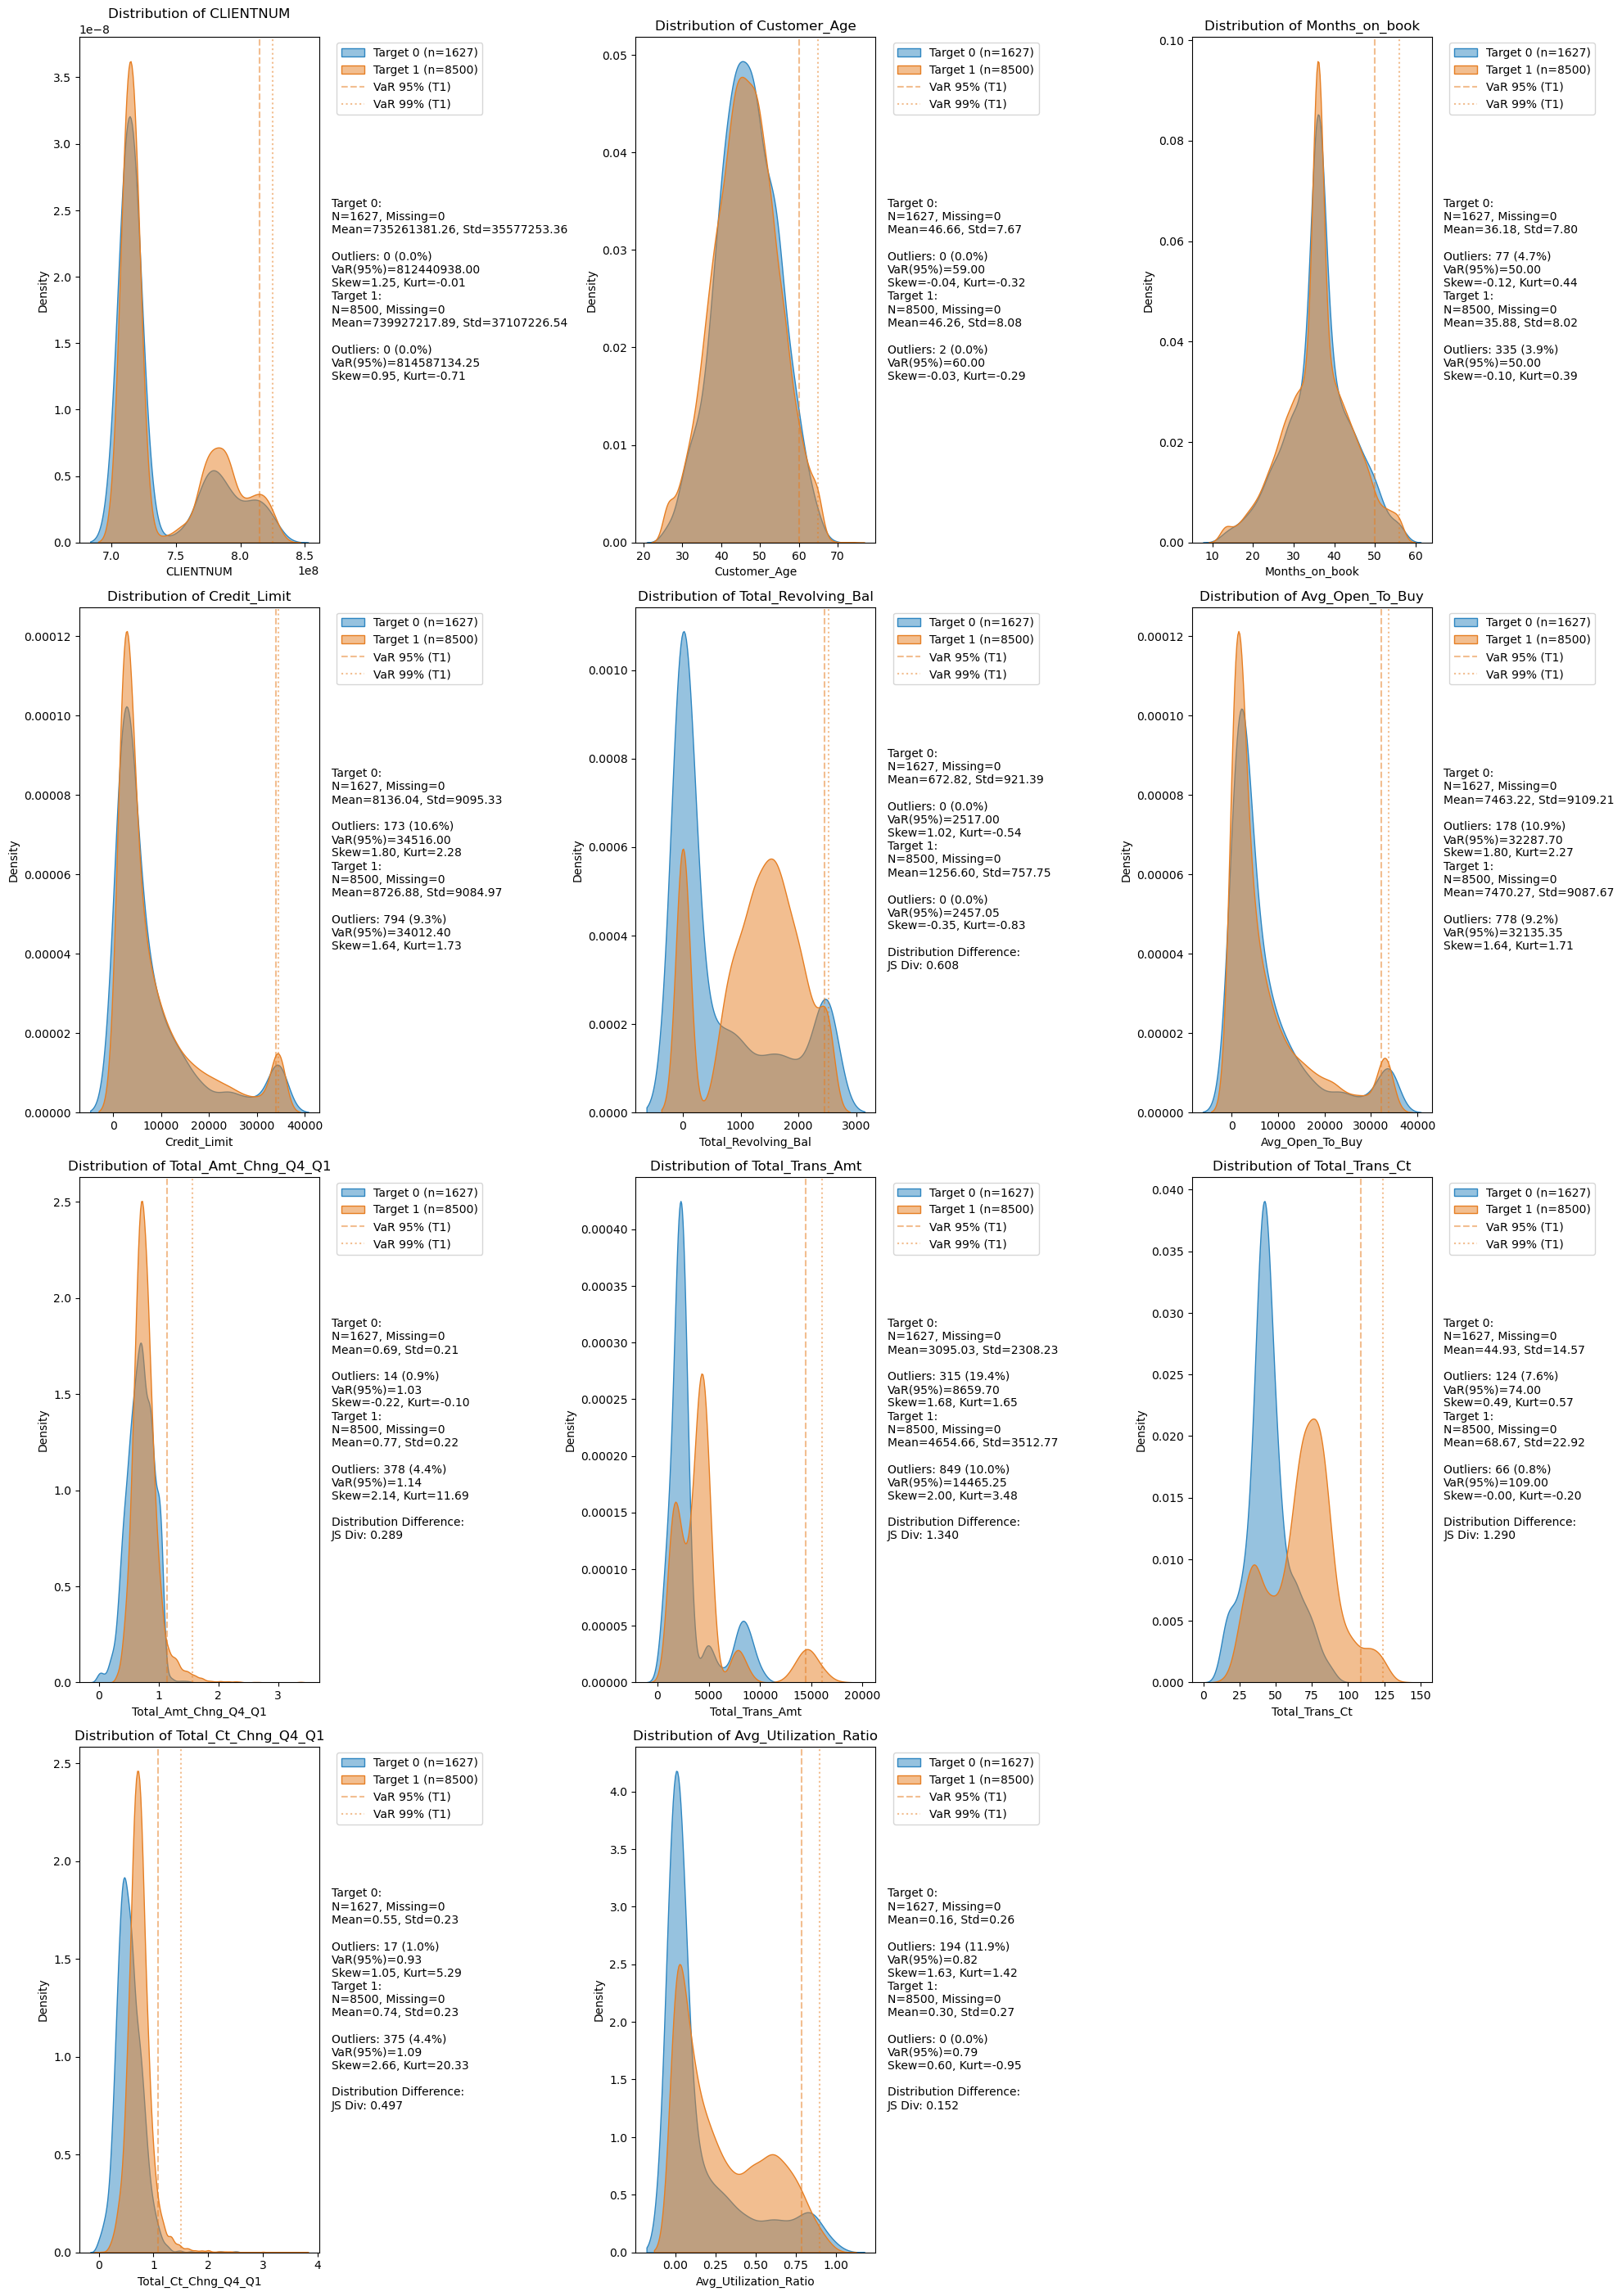

In [90]:
_=plot_numerical_kde_by_target(df,target_col ='Attrition_Flag')